TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS

### 1.Load and Explore dataset

In [1]:
import pandas as pd

In [2]:
## load dataset
df = pd.read_csv("blogs.csv")
df.shape

(2000, 2)

In [3]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [4]:
df['Labels'].value_counts()

Labels
alt.atheism                 100
comp.graphics               100
comp.os.ms-windows.misc     100
comp.sys.ibm.pc.hardware    100
comp.sys.mac.hardware       100
comp.windows.x              100
misc.forsale                100
rec.autos                   100
rec.motorcycles             100
rec.sport.baseball          100
rec.sport.hockey            100
sci.crypt                   100
sci.electronics             100
sci.med                     100
sci.space                   100
soc.religion.christian      100
talk.politics.guns          100
talk.politics.mideast       100
talk.politics.misc          100
talk.religion.misc          100
Name: count, dtype: int64

In [5]:
df['Labels'].nunique()

20

### 2. Data Preprocessing

##### Text Cleaning

In [10]:
##Clean text data to remove noise like HTML tags, special characters, and stop words
## here we will use regular expressions and text processing techniques to clean the text data
import re
from nltk.corpus import stopwords

In [9]:
import nltk

In [11]:
def clean_text(text):
    text = re.sub(r'<[^>]+>', '', text) 
    text = re.sub(r'[^\w\s]', '', text)  
    text = text.lower() 
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

In [12]:
df['Data'].apply(clean_text)

0       path cantaloupesrvcscmuedumagnesiumclubcccmued...
1       newsgroups altatheism path cantaloupesrvcscmue...
2       path cantaloupesrvcscmuedudasnewsharvardedunoc...
3       path cantaloupesrvcscmuedumagnesiumclubcccmued...
4       xref cantaloupesrvcscmuedu altatheism53485 tal...
                              ...                        
1995    xref cantaloupesrvcscmuedu talkabortion120945 ...
1996    xref cantaloupesrvcscmuedu talkreligionmisc837...
1997    xref cantaloupesrvcscmuedu talkorigins41030 ta...
1998    xref cantaloupesrvcscmuedu talkreligionmisc836...
1999    xref cantaloupesrvcscmuedu sciskeptic43561 tal...
Name: Data, Length: 2000, dtype: object

##### Tokenization and Vectorization:

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
##convert text data into numerical features using tf-idf

vectorizer = TfidfVectorizer(max_features=1000)
x = vectorizer.fit_transform(df['Data'])
y = df['Labels']

#### Model Building

In [14]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.20,random_state=42)

##### Model Training

In [19]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

##### Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.75
                          precision    recall  f1-score   support

             alt.atheism       0.61      0.78      0.68        18
           comp.graphics       0.76      0.72      0.74        18
 comp.os.ms-windows.misc       0.90      0.86      0.88        22
comp.sys.ibm.pc.hardware       0.64      0.84      0.72        25
   comp.sys.mac.hardware       0.80      0.57      0.67        21
          comp.windows.x       0.78      0.56      0.65        25
            misc.forsale       0.68      0.72      0.70        18
               rec.autos       0.65      0.94      0.77        18
         rec.motorcycles       0.71      0.75      0.73        16
      rec.sport.baseball       1.00      0.78      0.88        18
        rec.sport.hockey       0.70      0.93      0.80        15
               sci.crypt       0.83      1.00      0.90        19
         sci.electronics       0.50      0.44      0.47        16
                 sci.med       0.84      0.94      0.89     

In [22]:
print(confusion_matrix(y_test, y_pred))

[[14  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  1  2]
 [ 0 13  0  1  0  1  1  1  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  1  0  0  0  0  0  1  1  0  0  0  0  0  0  0]
 [ 0  0  0 21  1  0  0  1  0  0  0  1  1  0  0  0  0  0  0  0]
 [ 0  0  0  4 12  1  0  2  1  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  2  2  2  1 14  2  0  0  0  1  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  1  0 13  2  1  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 17  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2 12  0  0  0  0  1  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 14  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0 14  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0]
 [ 0  1  0  4  0  1  1  0  1  0  0  0  7  0  0  0  0  0  1  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  1  0  0  0  0  1  1  1 16  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 23  0  0

##### Sentiment Analysis

In [25]:
from textblob import TextBlob

# Function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [26]:
df['Sentiment'] = df['Data'].apply(get_sentiment)

In [31]:
sentiment_distribution = pd.crosstab(df['Labels'], df['Sentiment'])
print(sentiment_distribution)

Sentiment                 Negative  Positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc              22        78
talk.religion.misc              14        86


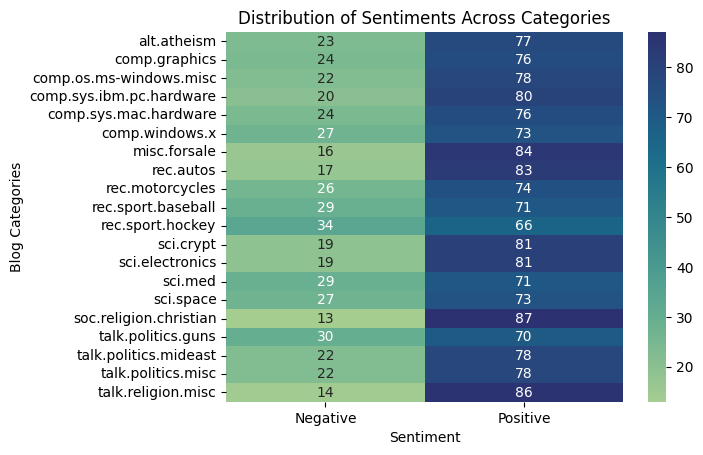

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(sentiment_distribution, annot=True, cmap="crest", fmt="d")
plt.title('Distribution of Sentiments Across Categories')
plt.ylabel('Blog Categories')
plt.xlabel('Sentiment')
plt.show()